# Assignment 1

**Assignment 1: Optimization**

**Goal**: ​Get familiar with gradient-based and derivative-free optimization by implementing these methods and applying them to a given function.

In this assignment we are going to learn about **gradient-based** (GD) optimization methods and **derivative-free optimization** (DFO) methods. The goal is to implement these methods (one from each group) and analyze their behavior. Importantly, we aim at noticing differences between these two groups of methods.

Here, we are interested in ​minimizing​ the following function:

$$
f(\mathbf{x})=x_{1}^{2}+2 x_{2}^{2}-0.3 \cos \left(3 \pi x_{1}\right)-0.4 \cos \left(4 \pi x_{2}\right)+0.7
$$

in the domain $\mathbf{x} = (x_1, x_2) \in [-100, 100]^{2}$ (i.e., $x_1 \in [-100, 100]$, $x_2 \in [-100, 100]$).

In this assignemnt, you are asked to implement:
1. The gradient-descent algorithm.
2. A chosen derivative-free algorithm. *You are free to choose a method.*

After implementing both methods, please run experiments and compare both methods. Please find a more detailed description below.

## 1. Understanding the objective

Please run the code below and visualize the objective function. Please try to understand the objective function, what is the optimum (you can do it by inspecting the plot).

If any code line is unclear to you, please read on that in numpy or matplotlib docs.

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# PLEASE DO NOT REMOVE!
# The objective function.
def f(x):
    return (
        x[:, 0] ** 2
        + 2 * x[:, 1] ** 2
        - 0.3 * np.cos(3.0 * np.pi * x[:, 0])
        - 0.4 * np.cos(4.0 * np.pi * x[:, 1])
        + 0.7
    )

In [18]:
# PLEASE DO NOT REMOVE!
# Calculating the objective for visualization.
def calculate_f(x1, x2):
    f_x = []
    for i in range(len(x1)):
        for j in range(len(x2)):
            f_x.append(f(np.asarray([[x1[i], x2[j]]])))

    return np.asarray(f_x).reshape(len(x1), len(x2))

In [19]:
# PLEASE DO NOT REMOVE!
# Define coordinates
x1 = np.linspace(-100.0, 100.0, 400)
x2 = np.linspace(-100.0, 100.0, 400)

# Calculate the objective
f_x = calculate_f(x1, x2).reshape(len(x1), len(x2))

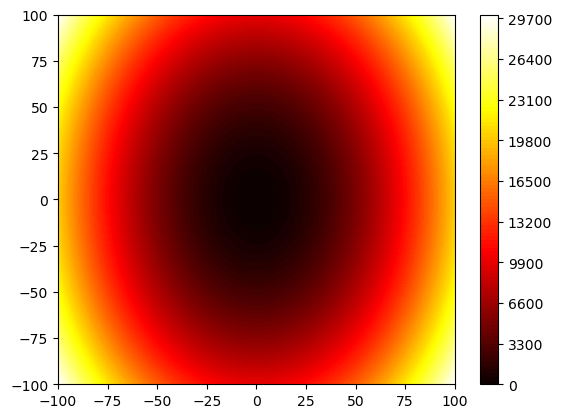

In [20]:
# PLEASE DO NOT REMOVE!
# Plot the objective
plt.contourf(x1, x2, f_x, 100, cmap="hot")
plt.colorbar()

## 2. The gradient-descent algorithm

First, you are asked to implement the gradient descent (GD) algorithm. Please take a look at the class below and fill in the missing parts.

NOTE: Please pay attention to the inputs and outputs of each function.

NOTE: To implement the GD algorithm, we need a gradient with respect to $\mathbf{x}$ of the given function. Please calculate it on a paper and provide the solution below. Then, implement it in an appropriate function that will be further passed to the GD class.

**Question 1 (0-1pt):** What is the gradient of the function $f(\mathbf{x})$? Please fill below both the mathematical expression and within the code.

**Answer:**
\begin{align*}
\nabla_{\mathbf{x}_1} f(\mathbf{x}) &=  \frac{\partial}{\partial x_1} \left( x_{1}^{2}+2 x_{2}^{2}-0.3 \cos \left(3 \pi x_{1}\right)-0.4 \cos \left(4 \pi x_{2}\right)+0.7 \right)=  2x_1 + 0.9\pi \sin(3\pi x_1)\\
\nabla_{\mathbf{x}_2} f(\mathbf{x}) &=  \frac{\partial}{\partial x_2} \left( x_{1}^{2}+2 x_{2}^{2}-0.3 \cos \left(3 \pi x_{1}\right)-0.4 \cos \left(4 \pi x_{2}\right)+0.7 \right)=  4x_2 + 1.6\pi \sin(4\pi x_2)\\
\end{align*}

In [21]:
# =========
# GRADING:
# 0
# 0.5pt - if properly implemented and commented well
# =========
# Implement the gradient for the considered f(x).

def grad(x):
    # x[:, 0] and x[:, 1] refer to x_1 and x_2 in the question
    grad_des_x1 = 2 * x[:, 0] + 0.9 * np.pi * np.sin(3 * np.pi * x[:, 0])
    grad_des_x2 = 4 * x[:, 1] + 1.6 * np.pi * np.sin(4 * np.pi * x[:, 1])
    grad = np.array([grad_des_x1, grad_des_x2])
    return grad



In [22]:
# =========
# GRADING:
# 0
# 0.5pt if properly implemented and commented well
# =========
# Implement the gradient descent (GD) optimization algorithm.
# It is equivalent to implementing the step function.
class GradientDescent(object):
    def __init__(self, grad, step_size=0.1):
        self.grad = grad
        self.step_size = step_size

    def step(self, x_old):
        # Compute the gradient at the current point
        grad_current = self.grad(x_old)
        # Update x_old by the gradient and the step size
        x_new = x_old - self.step_size * grad_current
        return x_new

In [23]:
# PLEASE DO NOT REMOVE!
# An auxiliary function for plotting.
def plot_optimization_process(ax, optimizer, title):
    # Plot the objective function
    ax.contourf(x1, x2, f_x, 100, cmap="hot")

    # Init the solution
    x = np.asarray([[90.0, -90.0]])
    x_opt = x
    # Run the optimization algorithm
    for i in range(num_epochs):
        x = optimizer.step(x)
        x_opt = np.concatenate((x_opt, x), 0)

    ax.plot(x_opt[:, 0], x_opt[:, 1], linewidth=3.0)
    ax.set_title(title)

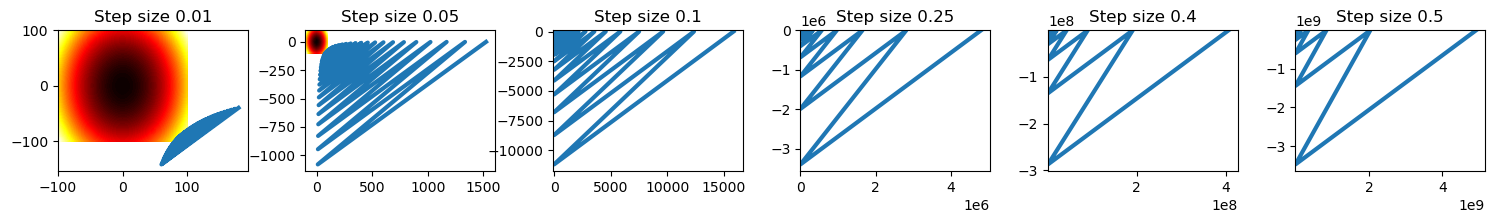

In [24]:
# PLEASE DO NOT REMOVE!
# This piece of code serves for the analysis.
# Running the GD algorithm with different step sizes
num_epochs = 20  # the number of epochs
step_sizes = [0.01, 0.05, 0.1, 0.25, 0.4, 0.5]  # the step sizes

# plotting the convergence of the GD
fig_gd, axs = plt.subplots(1, len(step_sizes), figsize=(15, 2))
fig_gd.tight_layout()

for i in range(len(step_sizes)):
    # take the step size
    step_size = step_sizes[i]
    # init the GD
    gd = GradientDescent(grad, step_size=step_size)
    # plot the convergence
    plot_optimization_process(
        axs[i], optimizer=gd, title="Step size " + str(gd.step_size)
    )

**Question 2 (0-0.5pt)**: Please analyze the plots above and comment on the behavior of the gradient-descent for different values of the step size. What happens in the small and large step sizes and what is the optimum step size?

**Answer**: Different step sizes gave rise to different results of the optimization. The smaller the step size, the more iterations it took for the algorithm to converge to the optimal solution (the dark area). The larger the step size, the faster it converged but may not converge to the optimal solution with strong oscillation. In this graph, step size 0.01 and 0.05 are too small, and 0.1 is too large. Therefore, the optimum step size is between 0.05 and 0.1.




**Question 3 (0-0.5pt)**: How can we improve the convergence when the step size equals 0.01? What about when the step size equals 0.5?

**Answer**: PLEASE FILL IN

## 3. The derivative-free optimization

In the second part of this assignment, you are asked to implement a derivative-free optimziation (DFO) algorithm. Please notice that you are free to choose any DFO method you wish.
Moreover, you are encouraged to be as imaginative as possible! Do you have an idea for a new method or combine multiple methods? Great!

**Question 4 (0-0.5-1-1.5-2-2.5-3pt)**: Please provide a description (a pseudocode) of your DFO method here.

*NOTE (grading): Please keep in mind: start simple, make sure your approach works. You are encouraged to use your creativity and develop more complex approaches that will influence the grading. TAs will also check whether the pseudocode is correct.*

**Answer:** The method of Hill Climbing with Local Search will be implemented to find a Peak of the input, with different step sizes.

*Input:* The input is a 2D matrix with all values integers.

1. The optimization procedure starts at one of the position of the matrix.
2. If the current position is a peak, the procedure stops.
3. If the current position is not a peak, the procedure traverses all its neighbors.
4. If the selected neighbor is higher than the current value, the current value is updated to the selected neighbor value.
5. If the selected neighbor is not higher than the current value, the current value remains unchanged.
6. The procedure repeats steps 2-5 until the current value is a peak.
7. The procedure stops when the current value is a peak.

The pseudocode is given below:



```
FUNCTION findPeak(matrix)
    IF matrix is empty THEN
        RETURN None
    ENDIF
    current_position = selectCorner(matrix, 0)
    // While the current value is not a peak
    WHILE TRUE DO
        current_value = matrix[current_position]
        neighbors = getNeighbors(matrix, current_position)
        max_neighbor_value, max_neighbor_position = findMaxNeighbor(neighbors)
        IF current_value >= max_neighbor_value THEN
            RETURN current_position
        ENDIF
        current_position = max_neighbor_position
    ENDWHILE
ENDFUNCTION

// Get the neighbors of the current position
FUNCTION getNeighbors(matrix, position)
    neighbors = []
    // A neighbor is a position that is {adjacent/diagonal}*step_size to the current position
    FOR neighbor_position IN ['RIGHT','DOWN','LEFT','UP','UPPER LEFT','UPPER RIGHT','LOWER LEFT','LOWER RIGHT'] DO
        IF isValidPosition(matrix, neighbor_position) THEN
            neighbors.APPEND((matrix[neighbor_position], neighbor_position))
        ENDIF
    ENDFOR
    RETURN neighbors
ENDFUNCTION

// Check if the position is valid
FUNCTION isValidPosition(matrix, position)
    RETURN position isin matrix
ENDFUNCTION

// Find the maximum neighbor
FUNCTION findMaxNeighbor(neighbors)
    max_value = -INFINITY
    max_position = None
    max_value=MAX(neighbors)
    max_position=POSITION(max_value)
    RETURN max_value, max_position
ENDFUNCTION

//Check if the current position is a peak, here a neighbor is a position that is adjacent/diagonal to the current position (Only one step)
FUNCTION isPeak(matrix, position)
    true_neighbors = getTrueNeighbors(matrix, position)
    IF matrix[position] >= MAX(true_neighbors) THEN
        RETURN True
    ELSE
        RETURN False
    ENDIF
ENDFUNCTION
```

In [25]:
# =========
# GRADING: 0-0.5-1-1.5-2pt
# 0
# 0.5pt the code works but it is very messy and unclear
# 1.0pt the code works but it is messy and badly commented
# 1.5pt the code works but it is hard to follow in some places
# 2.0pt the code works and it is fully understandable
# =========
# Implement a derivative-free optimization (DFO) algorithm.
# REMARK: during the init, you are supposed to pass the obj_fun and other objects that are necessary in your method.
class DFO(object):
    def __init__(self, matrix, obj_fun, step_size):
        self.matrix = matrix  # Matrix as input
        self.obj_fun = obj_fun  # Objective function
        self.step_size = step_size  # Step size

    def getNeighbors(self, position, step_size):
        neighbors = []
        directions = [(0, step_size), (step_size, 0), (0, -1*step_size), (-1*step_size, 0),  # Right, down, left, up
                    (-1*step_size, -1*step_size), (-1*step_size, step_size), (step_size, -1*step_size), (step_size, step_size)]  # Left upper, left down, right upper, right down
        for direction in directions:
            neighbor_position = (position[0] + direction[0], position[1] + direction[1])
            if self.isValidPosition(neighbor_position):
                neighbor_value = self.matrix[neighbor_position[0]][neighbor_position[1]]
                neighbors.append((neighbor_value, neighbor_position))
        return neighbors

    def getTrueNeighbors(self, position):
        neighbors = []
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0),  # Right, down, left, up
                    (-1, -1), (-1, 1), (1, -1), (1, 1)]  # Left upper, left down, right upper, right down
        for direction in directions:
            neighbor_position = (position[0] + direction[0], position[1] + direction[1])
            if self.isValidPosition(neighbor_position):
                neighbor_value = self.matrix[neighbor_position[0]][neighbor_position[1]]
                neighbors.append((neighbor_value, neighbor_position))
        return neighbors   
    

    def isValidPosition(self, position):
        # Check if the position is within the matrix
        return 0 <= position[0] < self.matrix.shape[0] and 0 <= position[1] < self.matrix.shape[1]

    def findMaxNeighbor(self, neighbors):
        # Find the neighbor with the highest value
        max_value = -np.inf
        max_position = None
        for value, position in neighbors:
            if value > max_value:
                max_value = value
                max_position = position
        return max_value, max_position

    def step(self, x_old):
        current_position = x_old
        current_value = self.matrix[current_position]
        neighbors = self.getNeighbors(current_position, self.step_size)
        max_neighbor_value, max_neighbor_position = self.findMaxNeighbor(neighbors)
        
        true_neighbors = self.getTrueNeighbors(current_position)
        max_true_neighbor_value, _ = self.findMaxNeighbor(true_neighbors)

        if current_value >= max_true_neighbor_value:
            # If the current value is greater than or equal to the value of the neighbor, it is a local peak
            print("Complete!")
            print("Local peak optimum at ", current_position, "with value", current_value)
            x_new = current_position
        else:
            # Otherwise, move to the position of the neighbor with the highest value
            x_new = max_neighbor_position

        return x_new

step_size=1
Complete!
Local peak optimum at  (16, 30) with value 106.76326518116912
step_size=2
Complete!
Local peak optimum at  (16, 30) with value 106.76326518116912
step_size=3
Cannot find the optimal solution.


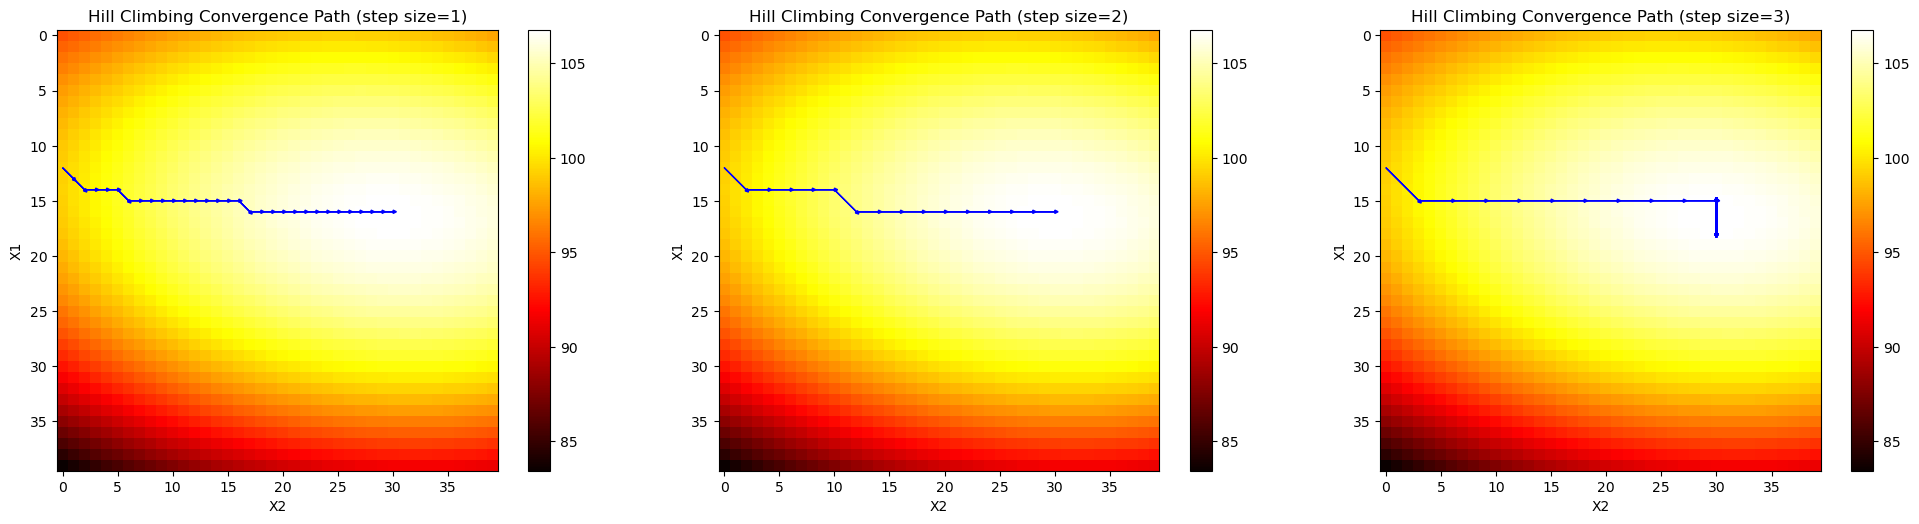

In [26]:
# PLEASE DO NOT REMOVE!
# Running the DFO algorithm with different step sizes
num_epochs = 50  # the number of epochs (you may change it!)
## PLEASE FILL IN
## Here all hyperparameters go.
step_sizes = [1, 2, 3]
size_matrix=40
## Please analyze at least one hyperparameter in a similar manner to the
## step size in the GD algorithm.
# Define the objective function, which is the value of the matrix at the current position
def obj_fun(x):
    return x

# Create a 40*40 matrix by Gaussian functions
x = np.linspace(-10, 1, size_matrix)
y = np.linspace(-10, 10, size_matrix)
x, y = np.meshgrid(x, y)
# Multiple centers and sigmas
centers = [(-50, -50), (0, 0), (50, 50)]
sigmas = [30, 20, 10]
matrix = np.zeros_like(x)
for center, sigma in zip(centers, sigmas):
    d = np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2)
    matrix += 100 * np.exp(-((d - 0) ** 2 / (2.0 * sigma**2)))

dfo = DFO(matrix, obj_fun, step_size=1)

start_position = (12, 0)
fig_dfo, axs = plt.subplots(1, len(step_sizes), figsize=(20, 5))
fig_dfo.tight_layout()


def plot_optimization_process(ax, optimizer, title):
    positions = [start_position]
    for _ in range(num_epochs):
        new_position = optimizer.step(positions[-1])
        if new_position == positions[-1]:  # If the position has not changed, the algorithm has reached the local optimum
            break
        positions.append(new_position)

    # If the algorithm cannot find the optimal solution
    if len(positions) == num_epochs + 1:
        print("Cannot find the optimal solution.")
    # Plot the convergence graph
    positions = np.array(positions)
    hot_maps = ax.imshow(
        matrix, cmap="hot", interpolation="nearest"
    ) 
    fig_dfo.colorbar(hot_maps, ax=ax)

    # Plot the convergence line
    for j in range(len(positions) - 1):
        ax.arrow(
            positions[j, 1],
            positions[j, 0],
            positions[j + 1, 1] - positions[j, 1],
            positions[j + 1, 0] - positions[j, 0],
            head_width=0.3,
            head_length=0.3,
            fc="blue",
            ec="blue",
        )

    ax.set_title(title)
    ax.set_xlabel("X2")
    ax.set_ylabel("X1")


# Run the DFO algorithm for each step size
for i, step_size in enumerate(step_sizes):
    # Initialize the DFO class instance
    print(f"step_size={step_size}")
    dfo = DFO(matrix, obj_fun, step_size=step_size)
    
    plot_optimization_process(
        axs[i],
        optimizer=dfo,
        title=f"Hill Climbing Convergence Path (step size={step_size})",
    )

**Question 5 (0-0.5-1pt)** Please comment on the behavior of your DFO algorithm. What are the strong points? What are the (potential) weak points? During working on the algorithm, what kind of problems did you encounter?

**Answer:** This algorithm is easy to deploy on any kinds of 2D matrix, and it is strong in searching local optimum because it checks all neighbors. Furthermore, it is robust against the noise and the randomness of the matrix, and is easy to modify to search for the local minimum. However, it is not efficient for searching global optimum, since it stops at the first peak it finds. And it is not suitable for searching the peak of the mountain, since it only considers the direct neighbors of the current position.
The most challenging part of this algorithm is to find  the right way to simulate "Hill Climbing" methodology, and to make it work for different kinds of matrix.



## 4. Final remarks: GD vs. DFO

Eventually, please answer the following last question that will allow you to conclude the assignment draw conclusions.

**Question 6 (0-0.5pt)**: What are differences between the two approaches?

**Answer**: Gradient Descent works only for continuous and differentiable optimization problems, and it is also sensitive to the initial guess. Derivative-free Optimization is easy to implement and requires less extra knowledge, it is also flexible for both discrete and continuous optimization problems. 


**Question 7 (0-0.5)**: Which of the is easier to apply? Why? In what situations? Which of them is easier to implement in general?

**Answer**: There is no abosolute answer for which is easier to apply, since there is no guarantee to find the global optimum for both methods. GD works well in conflex objective functions, while DFO is more flexible in non-convex optimization problems. In general GD is more used in general because it is faster and request less resources.